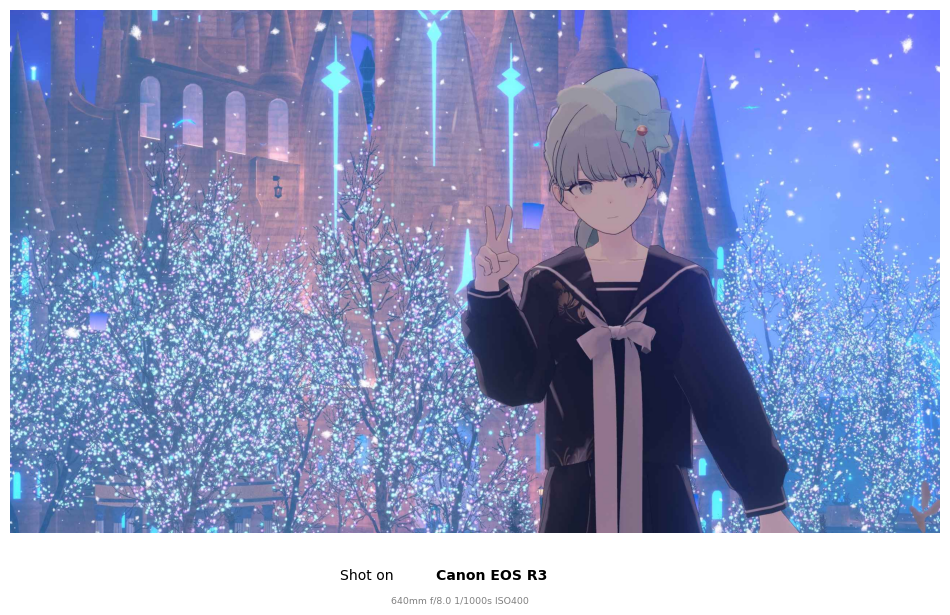

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.font_manager as fm

def add_text_to_image(image_path, texts, output_path=None):
    img = Image.open(image_path)
    img_width, img_height = img.size
    
    aspect_ratio = img_width / img_height
    fig_width = 12
    fig_height = fig_width / aspect_ratio
    
    relative_padding = max(0.05, min(0.1, 800 / max(img_width, img_height)))
    
    fig = plt.figure(figsize=(fig_width, fig_height * (1 + relative_padding)), 
                    facecolor='white')
    
    plt.imshow(img)
    plt.axis('off')
    
    base_font_size = fig_width * 0.7
    
    num_texts = len(texts)
    line_spacing = relative_padding / 3
    
    for i, text_config in enumerate(texts):
        if 'segments' in text_config:
            segments = text_config['segments']
            total_width = sum([len(seg['text']) for seg in segments])
            x_start = 0.5 - (total_width * 0.005)
            
            vertical_position = relative_padding * 0.8 - (i * line_spacing)
            
            for segment in segments:
                text = segment['text']
                bold = segment.get('bold', False)
                size_multiplier = segment.get('size', 1.0)
                color = segment.get('color', 'black')
                
                font_weight = 'bold' if bold else 'normal'
                font_size = base_font_size * size_multiplier
                
                plt.figtext(x_start, vertical_position,
                          text,
                          ha='left',
                          va='center',
                          fontsize=font_size,
                          color=color,
                          weight=font_weight)
                
                x_start += len(text) * 0.01
        else:
            text = text_config['text']
            bold = text_config.get('bold', False)
            size_multiplier = text_config.get('size', 1.0)
            color = text_config.get('color', 'black')
            
            vertical_position = relative_padding * 0.8 - (i * line_spacing)
            
            plt.figtext(0.5, vertical_position,
                       text,
                       ha='center',
                       va='center',
                       fontsize=base_font_size * size_multiplier,
                       color=color,
                       weight='bold' if bold else 'normal')
    
    plt.subplots_adjust(bottom=relative_padding)
    
    if output_path:
        plt.savefig(output_path,
                    bbox_inches='tight',
                    facecolor='white',
                    edgecolor='none',
                    pad_inches=relative_padding * fig_height * 0.3)
        plt.close()
    else:
        plt.show()

image_path = "./images/20241225_085106.jpg"

texts = [
    {
        'segments': [
            {
                'text': 'Shot on ',
                'bold': False,
                'size': 1.2,
                'color': 'black'
            },
            {
                'text': 'Canon EOS R3',
                'bold': True,
                'size': 1.2,
                'color': 'black'
            }
        ]
    },
    {
        'text': '640mm f/8.0 1/1000s ISO400',
        'bold': False,
        'size': 0.8,
        'color': 'gray'
    }
]

add_text_to_image(
    image_path=image_path,
    texts=texts
)